## lead categorization into high and low potential
#### Lead is basically an individaul who might be the customer (business opportunities)but currently isnt
#### Data exploration insights – Sales effectiveness.

## Business Case:
FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

## PROJECT GOAL: 
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)

#### Business Case: Predicting the lead category whether it is High Potential or Low Potential from the given sales dataset.

In [1]:
!pip install sqlalchemy 
!pip install pymysql
!pip install mysql-connector

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing the necessary libraries
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1) Connect the database

Database details:
DB Name: project_sales
Table Name: data
Host: 18.136.157.135
Port: 3306
Username: dm_team2
Password: DM!$Team&27@9!20!

In [3]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user= 'dm_team2',
                                  password='DM!$Team&27@9!20!' )

In [4]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


## 2) Load the dataset

In [7]:
query = "select * from data" # SQL statement
data = pd.read_sql(query,connection)#what Query and where to execute
print(data.shape)
data.head()

(7422, 9)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [8]:
data.to_csv('Sales.csv')

## 3) Domain Analysis

## 4) Basic Checks

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [10]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [11]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [12]:
data.shape

(7422, 9)

In [13]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

## 5) Exploratory Data Analysis

In [14]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [15]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [16]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [17]:
# Splitting Created Column to to convert date and time, so that our model will work efficiently.
data[['Created_date','Created_time']] = data['Created'].str.split(' ', n=1, expand=True)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_date,Created_time
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14-11-2018,10:05
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:22
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:21
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,08:46
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,07:34
...,...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28-04-2018,09:45
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28-04-2018,09:43
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28-04-2018,09:20
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28-04-2018,08:04


In [18]:
# Extracting Hours
data["Created_hour"] = pd.to_datetime(data["Created_time"]).dt.hour

# Extracting Minutes
data["Created_min"] = pd.to_datetime(data["Created_time"]).dt.minute

In [19]:
data["Created_day"] = pd.to_datetime(data.Created_date, format="%d-%m-%Y").dt.day
data["Created_month"] = pd.to_datetime(data["Created_date"], format = "%d-%m-%Y").dt.month
data["Created_year"] = pd.to_datetime(data.Created_date, format="%d-%m-%Y").dt.year

In [20]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status', 'Created_date', 'Created_time',
       'Created_hour', 'Created_min', 'Created_day', 'Created_month',
       'Created_year'],
      dtype='object')

In [21]:
data.drop(['Created','Created_date','Created_time'], axis=1, inplace=True) # Dropping columns after conversion.

In [22]:
data.head()

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month,Created_year
0,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,10,5,14,11,2018
1,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,9,22,14,11,2018
2,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,9,21,14,11,2018
3,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,8,46,14,11,2018
4,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,7,34,14,11,2018


In [23]:
# Dropping Mobile and Email because it contains all unique & unspecified values and dropping Created_year also because its all 2018.
data.drop(['Mobile','EMAIL','Created_year'], axis=1, inplace=True)

In [24]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Open,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Open,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Open,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Open,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Open,7,34,14,11


### Univariate Analysis

In [25]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
data.shape

(7422, 10)

In [27]:
## Analysing products
data.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [28]:
data.Product_ID.unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [29]:
data.Product_ID.replace(['25','21','2','12','26','14','11','22','3','17','6','8','13','24','16','23','0','28','7','4'],
                        'less sell',inplace=True)

In [30]:
data.Product_ID.sort_values()

0                
2727             
2729             
4979             
2556             
          ...    
5796    less sell
5843    less sell
5849    less sell
5854    less sell
7421    less sell
Name: Product_ID, Length: 7422, dtype: object

In [31]:
data.Source.unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [32]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [33]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.replace('By Recommendation','Customer Referral',inplace=True)
data.replace(['US Website','Just Dial'],'Website',inplace=True)
data.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [34]:
data.Source.value_counts()

Live Chat            2677
Call                 2547
Website              1787
Customer Referral     212
Existing Customer     146
Campaign               36
                       17
Name: Source, dtype: int64

In [35]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [36]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [37]:
# Defining 'Status' as High Potential or Low Potential
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High_Potential',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low_Potential',inplace=True)

In [38]:
data.Status.value_counts()

Low_Potential     4491
High_Potential    2931
Name: Status, dtype: int64

Low_Potential     4491
High_Potential    2931
Name: Status, dtype: int64

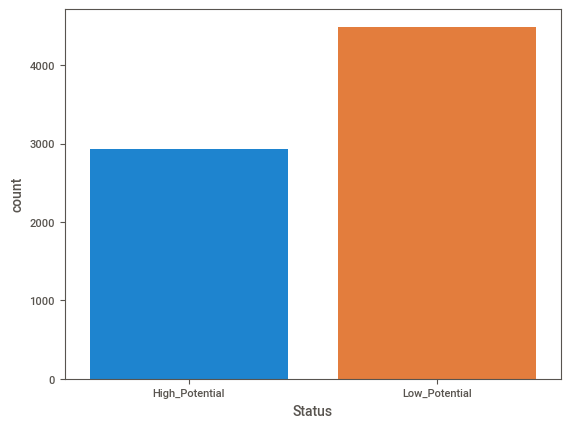

In [39]:
sns.countplot(x = "Status", data = data)
data.loc[:, 'Status'].value_counts()

In [40]:
data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [41]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [42]:
data.Location.value_counts()

Other Locations    2614
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Foreign             214
Pune                142
                     58
Name: Location, dtype: int64

In [43]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
Created_hour     0
Created_min      0
Created_day      0
Created_month    0
dtype: int64

In [44]:
# Dropping rows with missing data because they are few
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.shape

(7328, 10)

In [45]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,High_Potential,18,51,13,11
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,High_Potential,18,48,13,11
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,High_Potential,17,9,13,11
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Low_Potential,16,49,13,11
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,High_Potential,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,Call,Sales-Agent-6,Mumbai,Mode-4,Low_Potential,9,45,28,4
7324,15,Call,Sales-Agent-12,Other Locations,Mode-5,Low_Potential,9,43,28,4
7325,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Low_Potential,9,20,28,4
7326,less sell,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Low_Potential,8,4,28,4


### univariate analysis of categorical variables

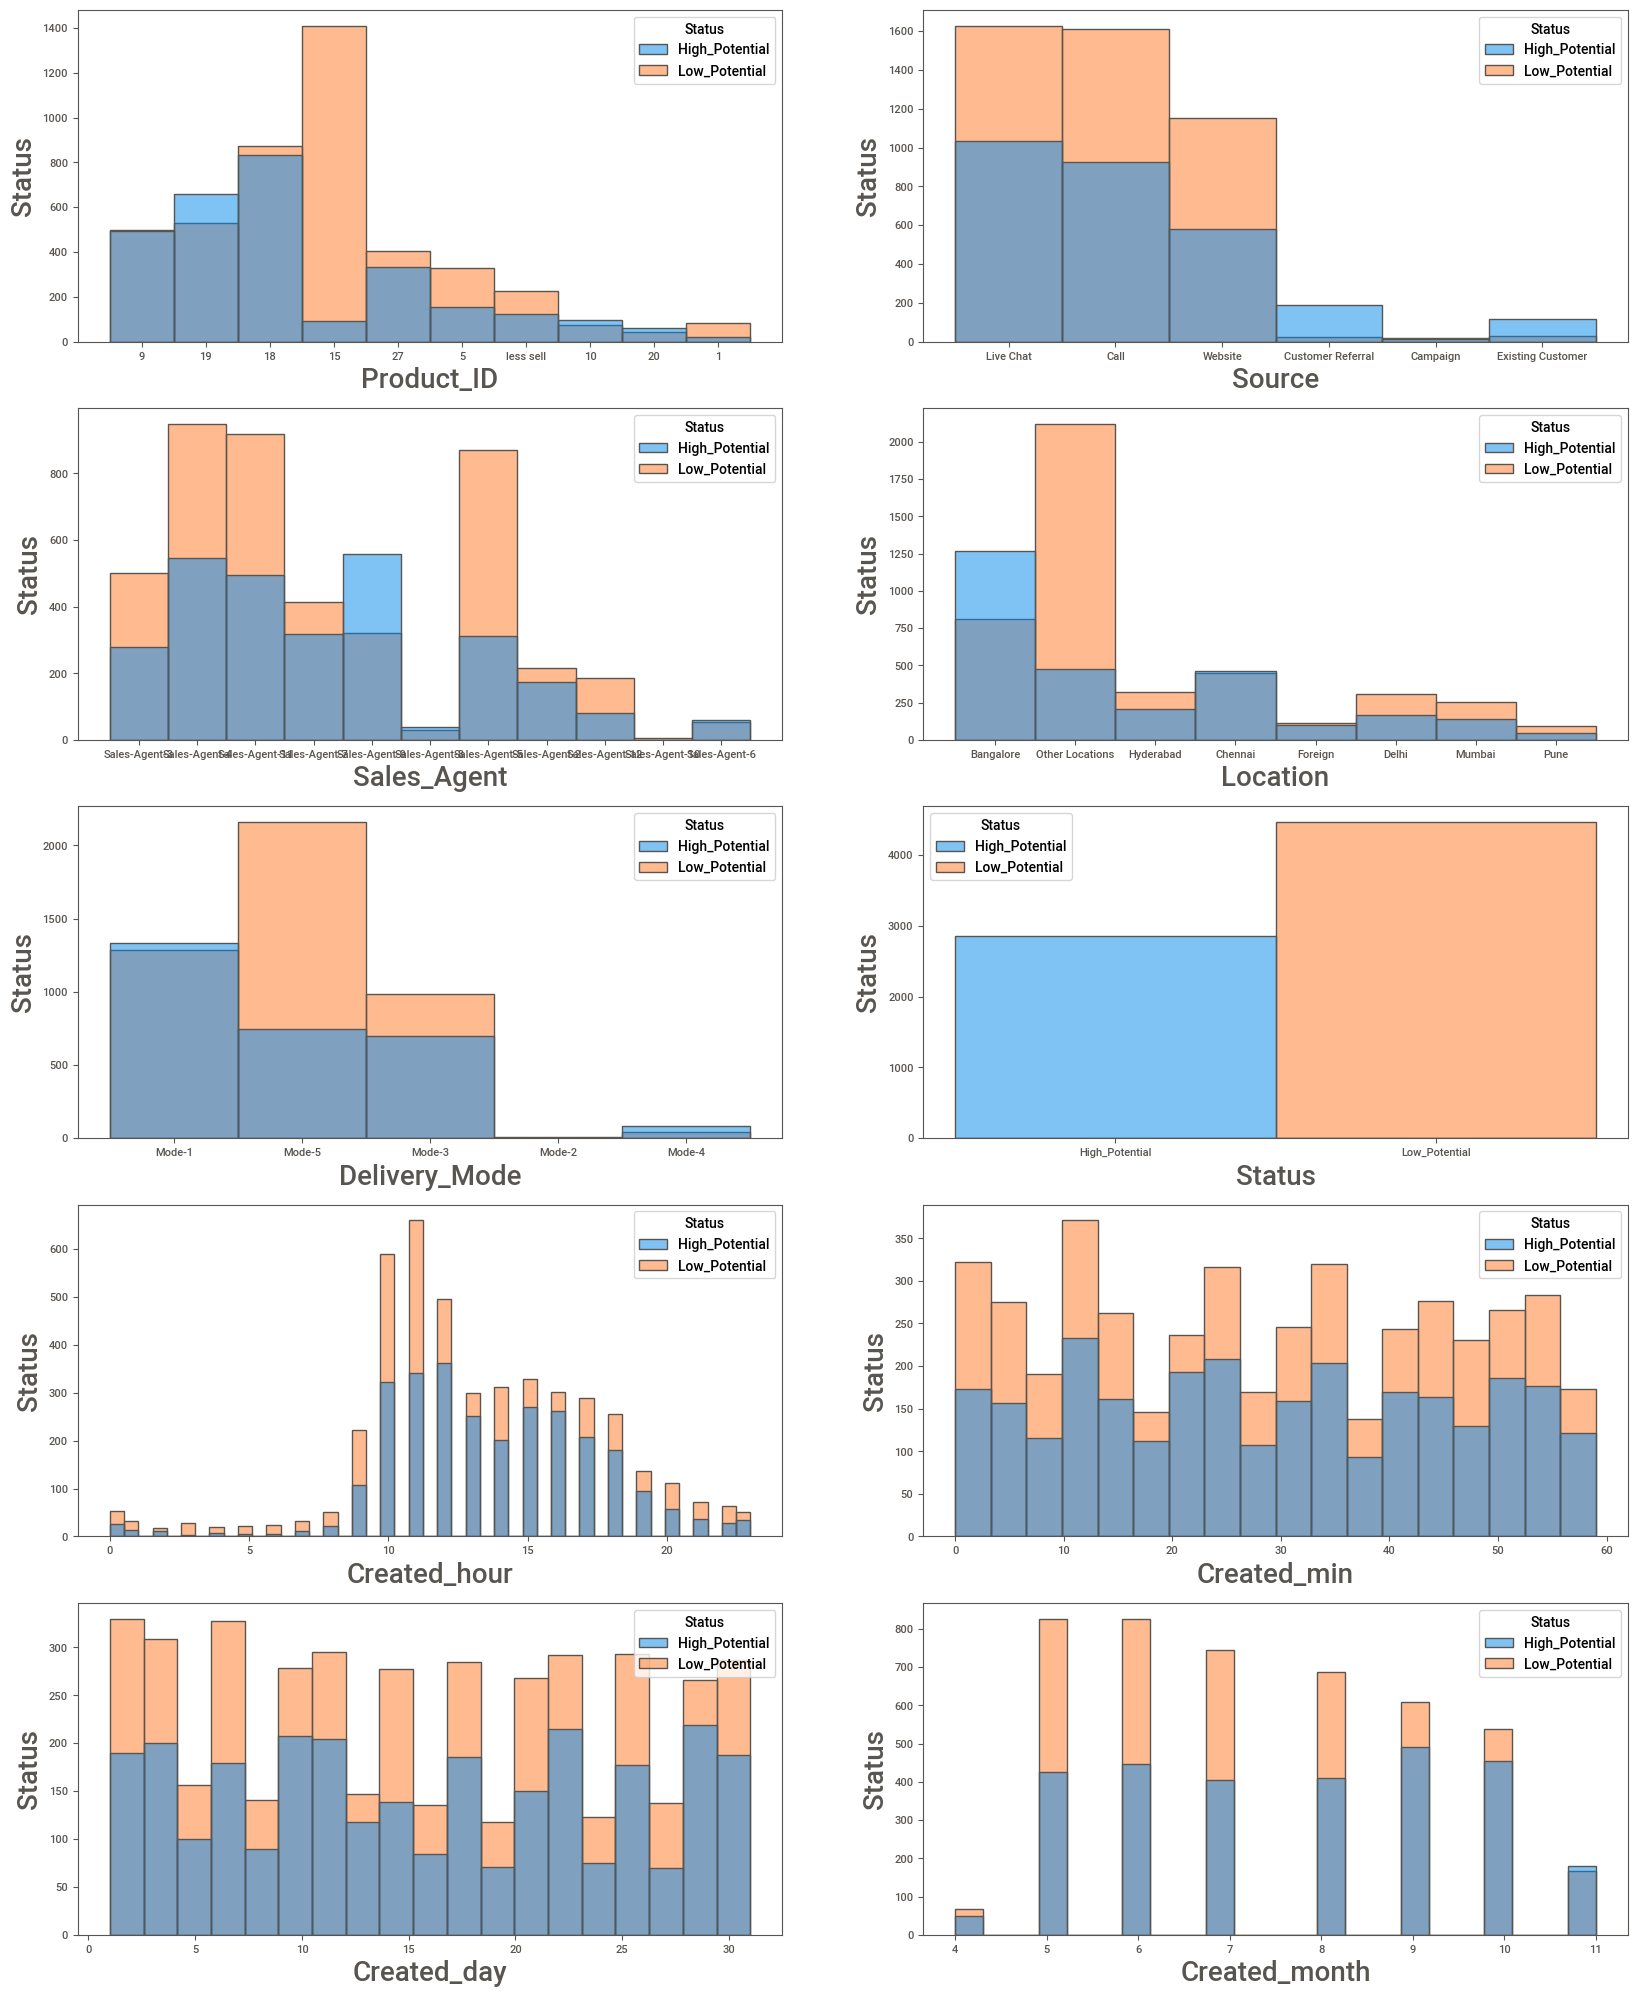

In [47]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 : # as there are 10 columns in the dataset.
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=data[column],hue=data.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.show()

##### From Above graphical representation and from sweetviz analysis we get insights:-
1) Product ID 15 has highest number of Nonpotential lead.

2) Delivery_Mode Mode-1 has only Potential Lead and Mode-4 also but having really less amount of deliveries from Mode-4.

3) There are most number of lead from Other Locations and having most number of Nonpotential Lead.

4) Sales_Agent 4,5 and 11 provides maximum no. of lead but most of them are Nonpotential.

5) From Source Call, Live Chat-Direct and Website we are getting highest no. of lead.

### Handling Categorical Data

In [48]:
# Converting Source using Frequency encoder
# grouping by frequency
fq = data.groupby('Source').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('Source')] = data['Source'].map(fq)
# drop original column.
data = data.drop(['Source'], axis = 1)

In [49]:
data.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [50]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1495
Sales-Agent-11    1414
Sales-Agent-5     1182
Sales-Agent-9      878
Sales-Agent-3      780
Sales-Agent-7      734
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10       5
Name: Sales_Agent, dtype: int64

In [51]:
# Handling Sales_Agent using Label Encoder.
data.replace({'Sales-Agent-1': 1, 'Sales-Agent-2': 2, 'Sales-Agent-3': 3, 'Sales-Agent-4': 4, 'Sales-Agent-5': 5, 'Sales-Agent-6': 6, 'Sales-Agent-7': 7,'Sales-Agent-8': 8,'Sales-Agent-9': 9,'Sales-Agent-10': 10,'Sales-Agent-11': 11,'Sales-Agent-12': 12},inplace=True) 

In [52]:
# Converting Location using Frequency encoder
# grouping by frequency
fq1 = data.groupby('Location').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('Location')] = data['Location'].map(fq1)
# drop original column.
data = data.drop(['Location'], axis = 1)

In [53]:
# As Delivery_Mode is Nominal Categorical data we will perform OneHotEncoding

Delivery_Mode = data[["Delivery_Mode"]]

Delivery_Mode = pd.get_dummies(Delivery_Mode)

data = pd.concat([data,Delivery_Mode],axis=1)

In [54]:
data.drop(['Delivery_Mode'], axis =1, inplace= True)

In [55]:
# Converting Status
data.replace({'Low_Potential': 0, 'High_Potential': 1}, inplace = True)

In [56]:
data

,Product_ID,Sales_Agent,Status,Created_hour,Created_min,Created_day,Created_month,Source_freq_encode,Location_freq_encode,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,9,3,1,18,51,13,11,0.363401,0.283706,1,0,0,0,0
1,19,4,1,18,48,13,11,0.346070,0.354121,0,0,0,0,1
2,18,11,1,17,9,13,11,0.236900,0.354121,1,0,0,0,0
3,15,7,0,16,49,13,11,0.236900,0.071916,1,0,0,0,0
4,18,7,1,16,37,13,11,0.346070,0.283706,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,9,6,0,9,45,28,4,0.346070,0.054449,0,0,0,1,0
7324,15,12,0,9,43,28,4,0.346070,0.354121,0,0,0,0,1
7325,5,11,0,9,20,28,4,0.363401,0.283706,1,0,0,0,0
7326,less sell,4,0,8,4,28,4,0.019787,0.354121,1,0,0,0,0


In [57]:
data.replace({'less sell':1},inplace=True)

0    4466
1    2862
Name: Status, dtype: int64

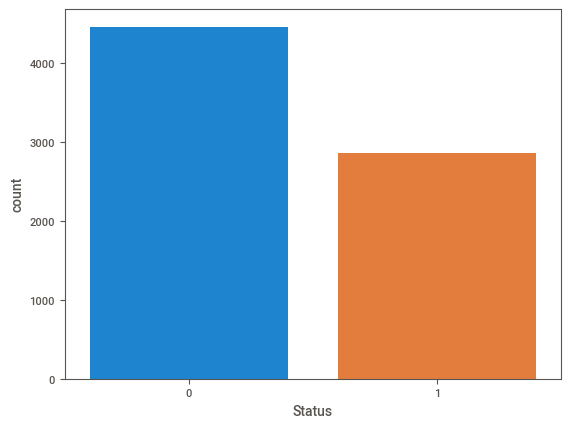

In [59]:
sns.countplot(x = "Status", data = data)
data.loc[:, 'Status'].value_counts()

In [116]:
data.to_csv('Sales_final.csv')

## 6) Feature Selection

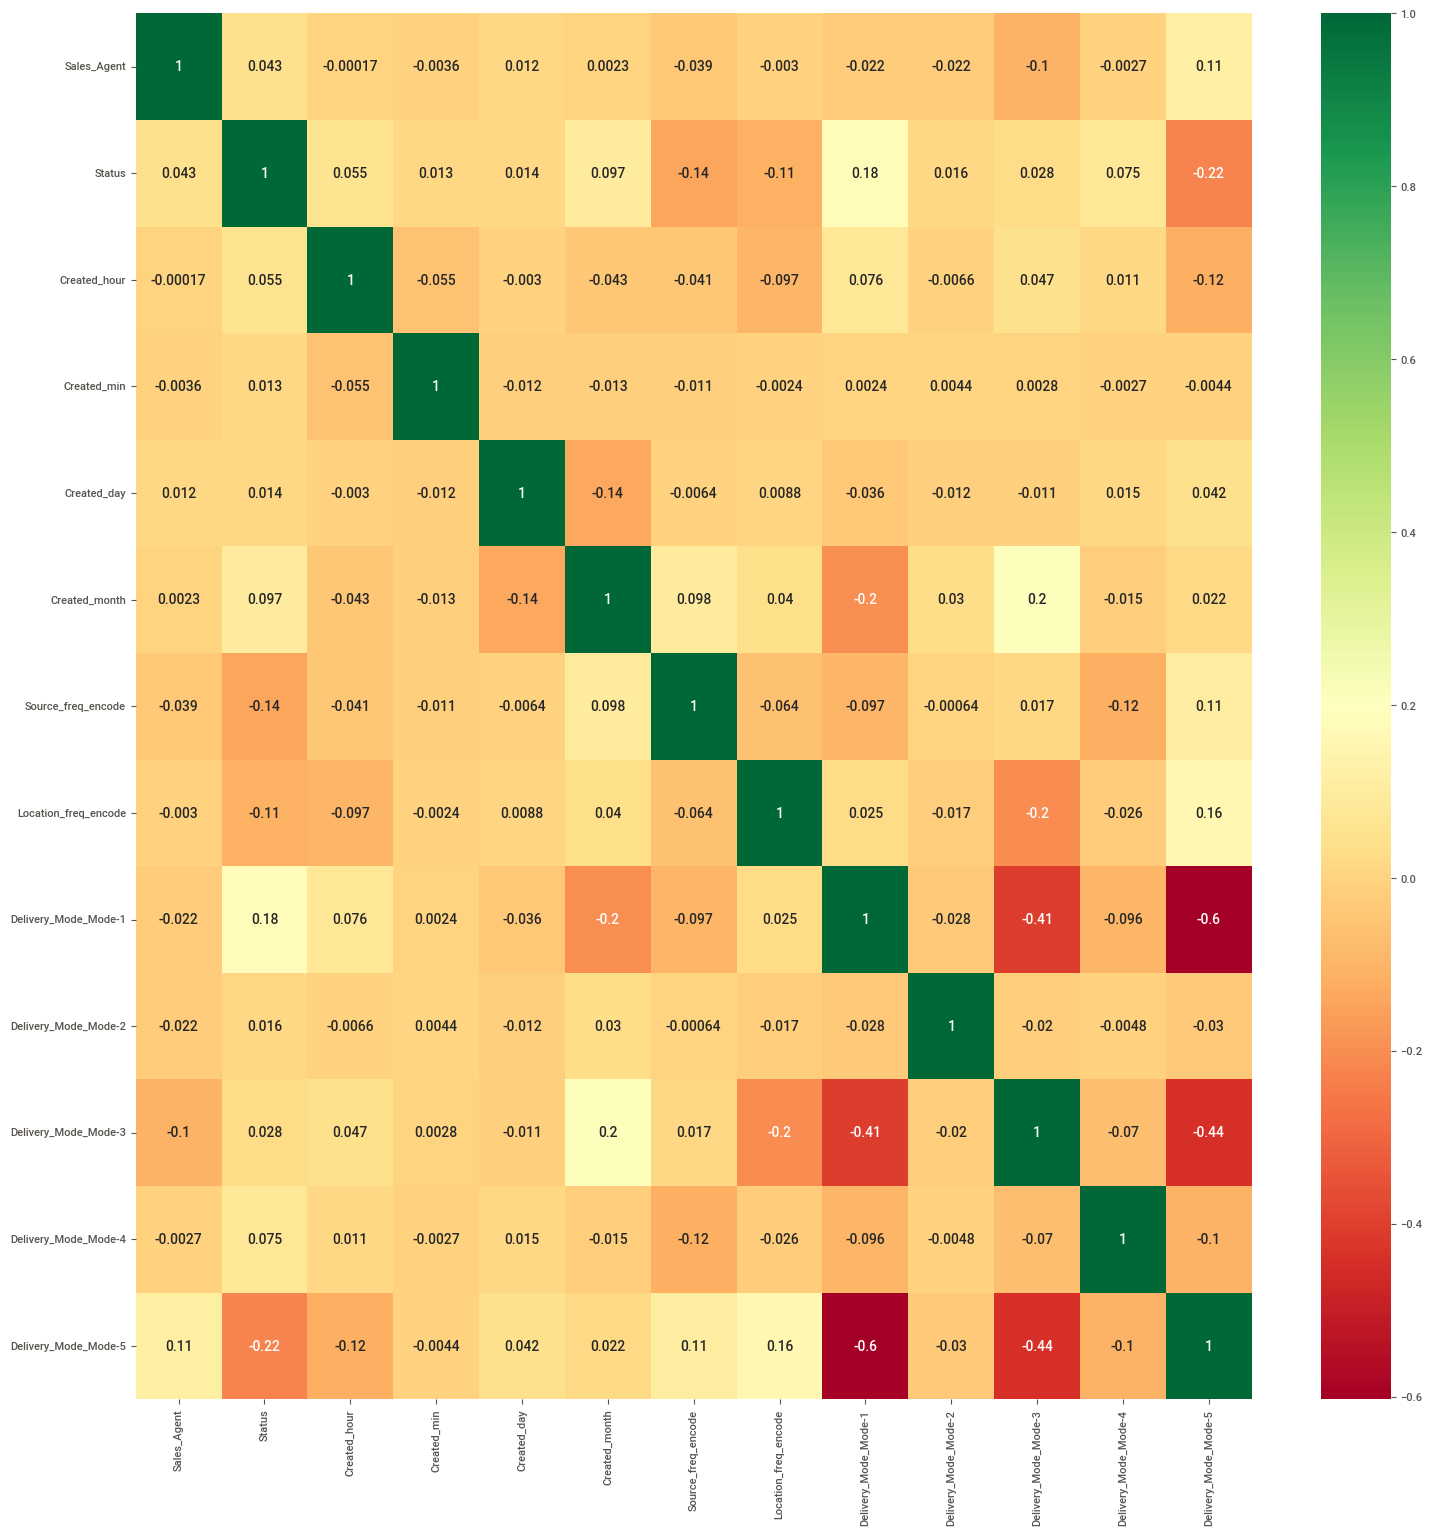

In [60]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## 7) Model Creation

In [61]:
from sklearn.model_selection import train_test_split
x= data.drop('Status', axis=1)
y= data['Status']

In [62]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

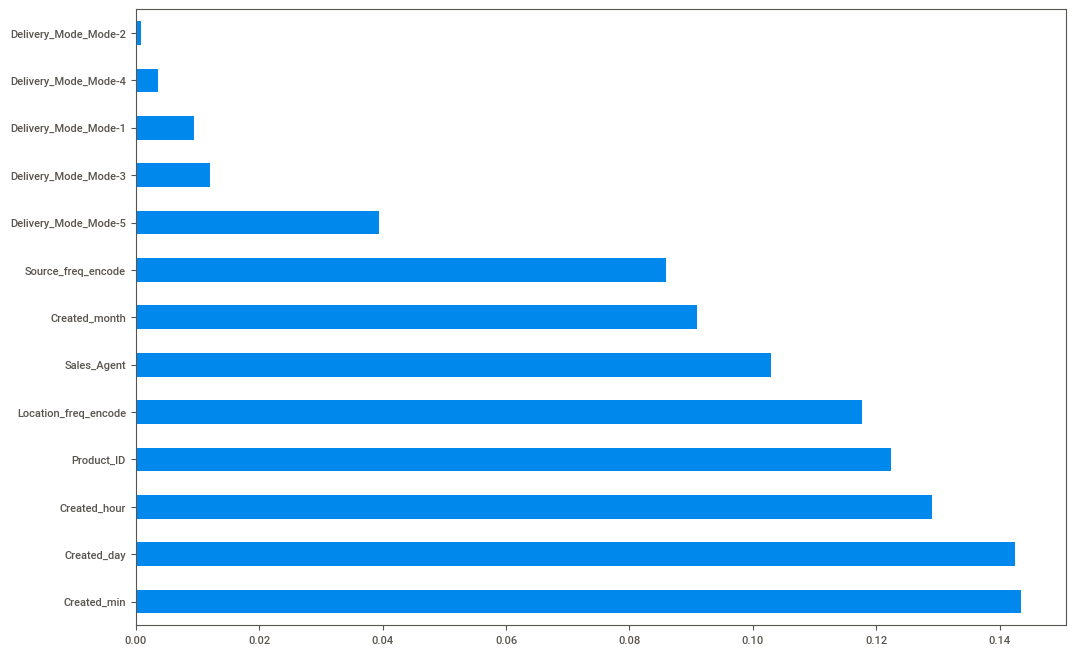

In [63]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Checking the dataset

In [64]:
# target class count
data["Status"].value_counts()

0    4466
1    2862
Name: Status, dtype: int64

Text(0.5, 1.0, 'target variable')

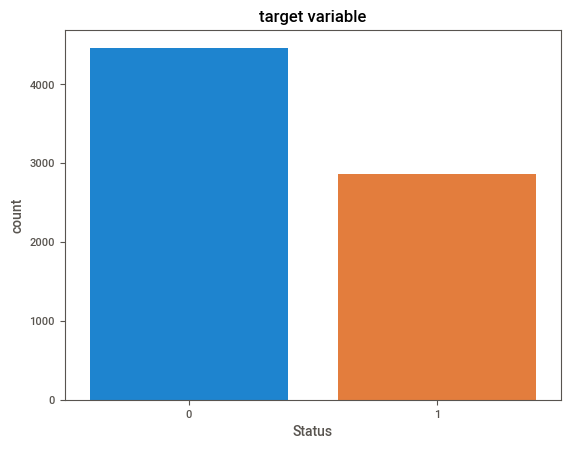

In [65]:
sns.countplot(data["Status"])
plt.title("target variable")

### Handling imbalanced dataset

In [66]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 4466, 1: 2862})
Counter({1: 4466, 0: 4466})


In [67]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size= 0.25,random_state=42)

### Using Logestic Regression

In [68]:
## model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred = log_reg.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1081
           1       0.62      0.34      0.44       751

    accuracy                           0.65      1832
   macro avg       0.64      0.60      0.59      1832
weighted avg       0.64      0.65      0.62      1832



In [71]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred)
score

0.5985432928774584

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.72891542 0.74659021 0.69003145 0.67217245 0.61456824]
Cross validation Score: 0.6904555538752739
Std : 0.04631111466779346


### Using Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
y_hat=dt.predict(x_test)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(x_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

0.7691048034934498

In [75]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accur

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3385
           1       0.73      0.64      0.68      2111

    accuracy                           0.77      5496
   macro avg       0.76      0.74      0.75      5496
weighted avg       0.77      0.77      0.77      5496



In [76]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
Status,,
0,2874,511
1,758,1353


In [77]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.6807547169811321

In [78]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.6774017467248908

In [79]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.5676664228237015

In [80]:
print(classification_report(y_test,y_hat))# for  testing

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1081
           1       0.63      0.52      0.57       751

    accuracy                           0.68      1832
   macro avg       0.67      0.65      0.66      1832
weighted avg       0.67      0.68      0.67      1832



In [81]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,0,1
Status,,
0,853,228
1,363,388


### HYPER PARAMETER TUNING FOR DECISION TREE

In [82]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [83]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 2, 'splitter': 'best'})


In [84]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'splitter': 'best'}

In [85]:
tree_cv.best_score_#getting best score from cv

0.5928134870924974

In [87]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf= 11,min_samples_split=2,splitter='best')

In [88]:
dt1.fit(x_train,y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=6, min_samples_leaf=11)

In [89]:
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
acc_test

0.6850436681222707

In [91]:
test_f1=f1_score(y_test,y_hat1)#f1_score
test_f1

0.592226148409894

In [92]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1081
           1       0.63      0.56      0.59       751

    accuracy                           0.69      1832
   macro avg       0.67      0.67      0.67      1832
weighted avg       0.68      0.69      0.68      1832



[Text(0.4741695491412214, 0.9545454545454546, 'X[12] <= 0.465\nentropy = 0.961\nsamples = 5496\nvalue = [3385, 2111]'),
 Text(0.20401956106870228, 0.8636363636363636, 'X[6] <= 0.219\nentropy = 0.998\nsamples = 3297\nvalue = [1743, 1554]'),
 Text(0.02838740458015267, 0.7727272727272727, 'X[6] <= 0.009\nentropy = 0.616\nsamples = 269\nvalue = [41, 228]'),
 Text(0.007633587786259542, 0.6818181818181818, 'X[3] <= 50.926\nentropy = 0.985\nsamples = 21\nvalue = [9, 12]'),
 Text(0.0057251908396946565, 0.5909090909090909, 'X[1] <= 3.915\nentropy = 0.971\nsamples = 20\nvalue = [8, 12]'),
 Text(0.003816793893129771, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.007633587786259542, 0.5, 'X[3] <= 5.776\nentropy = 0.991\nsamples = 18\nvalue = [8, 10]'),
 Text(0.0057251908396946565, 0.4090909090909091, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.009541984732824428, 0.4090909090909091, 'X[0] <= 23.099\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.0076335877862595

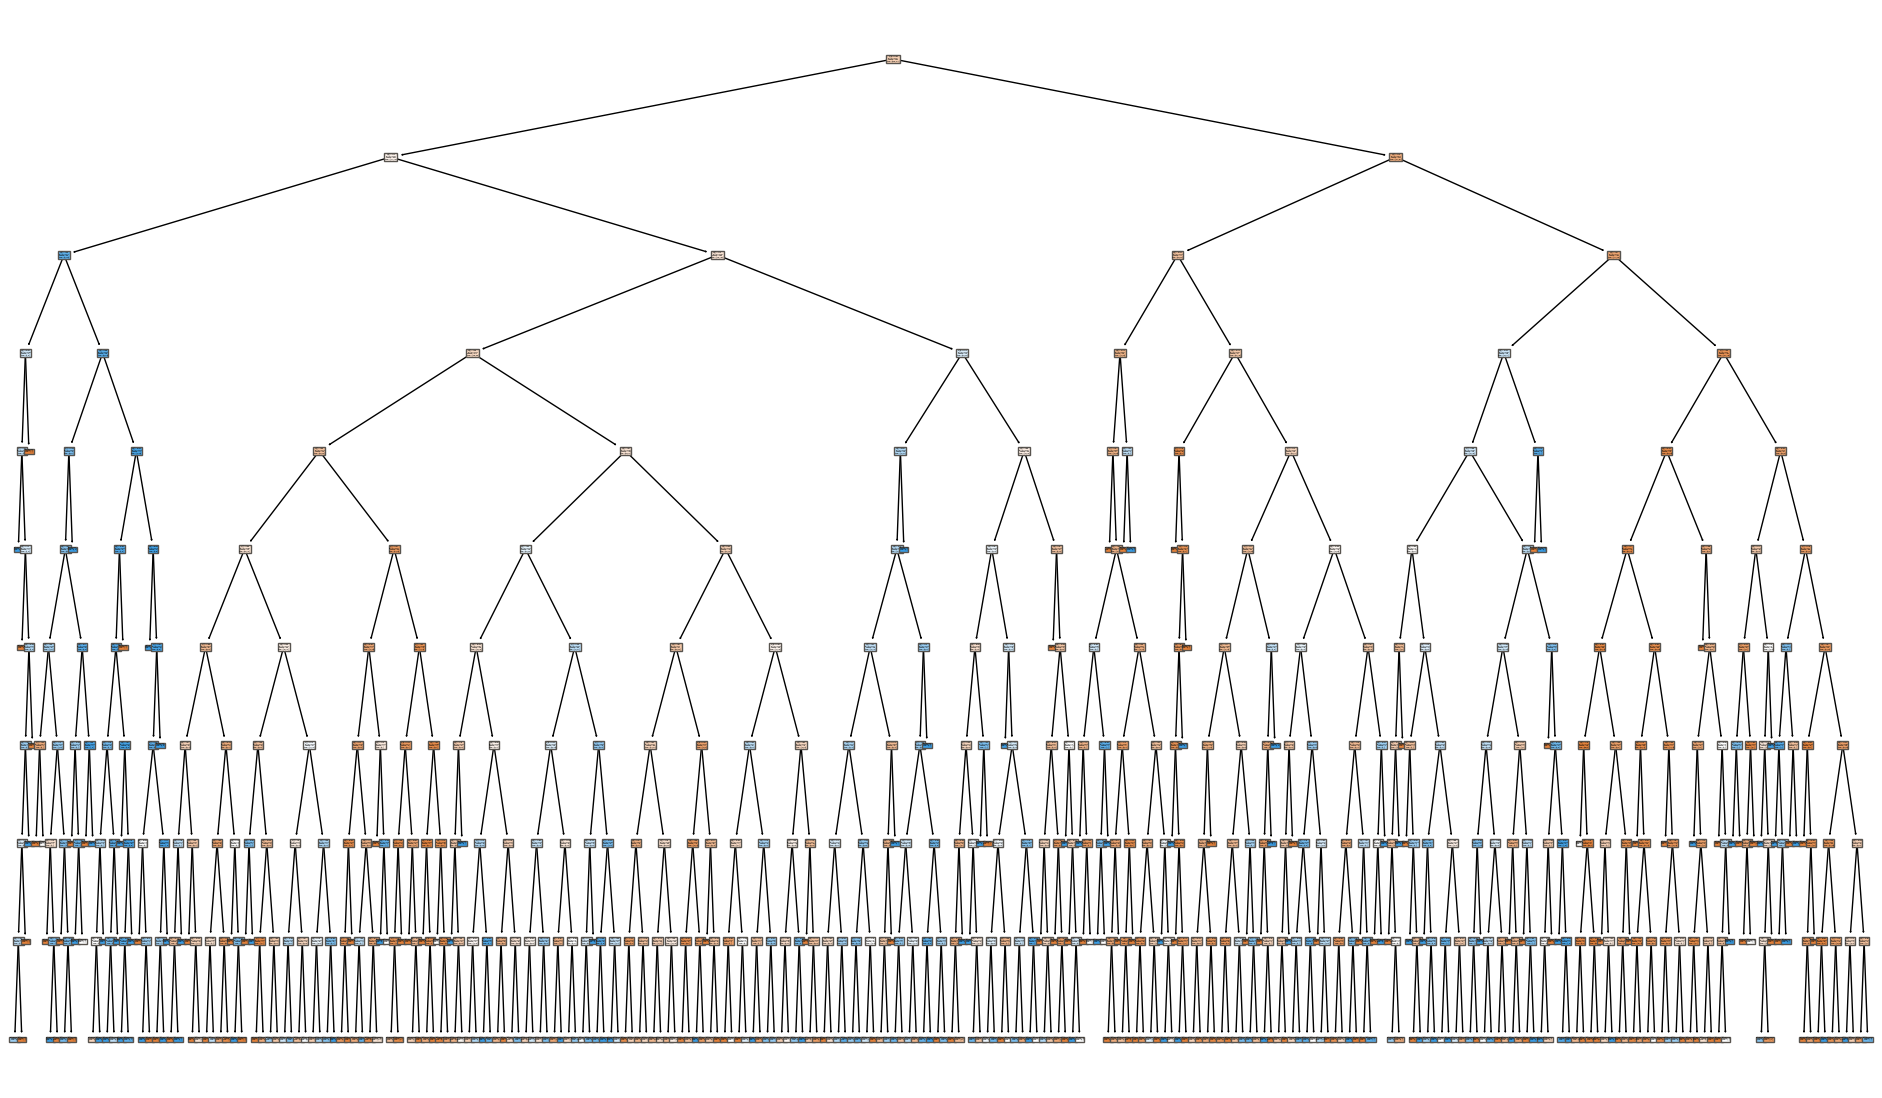

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt, filled=True)

### Using Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [95]:
y_pred1=rf_clf.predict(x_test)

In [96]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1081
           1       0.67      0.51      0.58       751

    accuracy                           0.70      1832
   macro avg       0.69      0.67      0.67      1832
weighted avg       0.69      0.70      0.69      1832



In [97]:
score=roc_auc_score(y_test,y_pred1)
score

0.6671117510910521

In [98]:
scores = cross_val_score(rf_clf,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.70557897 0.47068434 0.50099439 0.63910152 0.6785987 ]
Cross validation Score: 0.5989915849249768
Std : 0.09526087284779387


### Hyperparameter tuning for Random Forest Classifier

In [99]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})


In [100]:
rf_clf2 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 10, bootstrap= False)
rf_clf2.fit(x_train, y_train)
y_predict=rf_clf2.predict(x_test)

In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78      1081
           1       0.70      0.51      0.59       751

    accuracy                           0.71      1832
   macro avg       0.71      0.68      0.68      1832
weighted avg       0.71      0.71      0.70      1832



In [102]:
score=roc_auc_score(y_test,y_predict)
score

0.6782686298010301

In [103]:
scores = cross_val_score(rf_clf2,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.74406133 0.520746   0.53438033 0.66151653 0.69412838]
Cross validation Score: 0.6309665155962507
Std : 0.08853317605053268


### USING SUPPORT VECTOR MACHINES

In [104]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)

In [105]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1081
           1       0.00      0.00      0.00       751

    accuracy                           0.59      1832
   macro avg       0.30      0.50      0.37      1832
weighted avg       0.35      0.59      0.44      1832



In [106]:
score=roc_auc_score(y_test,y_pred2)
score

0.5

In [107]:
scores = cross_val_score(svc,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.63898384 0.6874371  0.65523263 0.65112491 0.54605753]
Cross validation Score: 0.6357671998384191
Std : 0.047629219535246105


### Artificial Neural Network (ANN)

In [108]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3), # 1st hidden layer with 50units and 2nd hidden layer will have 3unitslearning_rate_init=0.1, # The initial learning rate used. It controls the step-size in updating the weights.  
                       max_iter=100, # Maximum number of iterations. default=200. This is called as stopping criteria.
                       random_state=2) 

model.fit(x_train,y_train) ## training the data

y_predict_proba = model.predict_proba(x_test) ## predicting the probability of class
y_predict_proba

array([[0.62919177, 0.37080823],
       [0.59222187, 0.40777813],
       [0.7207892 , 0.2792108 ],
       ...,
       [0.67000952, 0.32999048],
       [0.61051108, 0.38948892],
       [0.74823157, 0.25176843]])

In [109]:
y_predict1 = model.predict(x_test) # Predicting for X_test

y_train_predict = model.predict(x_train) # predicting for X_train

In [110]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix

print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict1))

Train accuracy : 0.6761280931586608
Test accuracy : 0.6468340611353712


In [111]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1081
           1       0.60      0.42      0.49       751

    accuracy                           0.65      1832
   macro avg       0.63      0.61      0.61      1832
weighted avg       0.64      0.65      0.63      1832



### Using Naive Bayes Bernoulli

In [112]:
## Model creation
from sklearn.naive_bayes import BernoulliNB

## model object creation
nb=BernoulliNB(alpha=0.01) #alpha is a regularization parameter # Avoid overfitting.

## fitting the model
nb.fit(x_train,y_train)

## getting the prediction
y_hat2=nb.predict(x_test) 

In [113]:
y_hat2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [114]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1081
           1       0.55      0.50      0.53       751

    accuracy                           0.63      1832
   macro avg       0.61      0.61      0.61      1832
weighted avg       0.62      0.63      0.63      1832



#### CONCLUSION
##### Analysis

The data is supervised and categorical. The predictor variables are nominal. The target variable 'Status' is nominal as well.

Most of the columns had a lot of different labels, so we compressed and merged the labels such that only the main ones were included and then used Label Encoding. The predictor variable was categorized into two types 'Good Lead' and 'Bad Lead'.

SMOTE is used ajdusting the sampling data. For training the data and predicting the target, algorithms used are Logistic .Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes and Artificial Neural Network

#### SUMMARY

The project is done with the purpose of finding out the Lead Quality, whether the lead should be followed or not. The company motive is to invest in the right prospects. So therefore we divided the Lead as 'Good' or 'Bad'. This resulted in increase of accuracy drastically.

After considering the performance of all the models on the basis of Accuracy, f1 Score, ruc score and cross-validation it is concluded that Random Forest should be selected as our final model.

#### DecisionTree Classifier gave an accuracy of 76%.

The project is completed with the purpose of finding out the lead quality. The company's motive is to invest in the right prospects. We divided the Lead as 'High Potential=0 , Low Potential=1' . The result in increasing of accuracy drastically change when XGBoost Classifier is used.